In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install pixellib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.3/430.3 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 kB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [2]:
import os
import fileinput

# Define the path to the file that needs to be modified
FILE_PATH = "/usr/local/lib/python3.10/dist-packages/pixellib/semantic/deeplab.py"

# Define the old and new strings that need to be replaced
OLD_STRING = "tensorflow.python.keras"
NEW_STRING = "tensorflow.keras"

# Use fileinput to replace the old string with the new string in the file
for line in fileinput.input(FILE_PATH, inplace=True):
    print(line.replace(OLD_STRING, NEW_STRING), end='')

# Define the old and new strings that need to be replaced
# This handles model loading errors
OLD_STRING = "tensorflow.keras.utils.layer_utils import get_source_inputs"
NEW_STRING = "tensorflow.python.keras.utils.layer_utils import get_source_inputs"

# Use fileinput to replace the old string with the new string in the file
for line in fileinput.input(FILE_PATH, inplace=True):
    print(line.replace(OLD_STRING, NEW_STRING), end='')

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:
import pixellib
from pixellib.semantic import semantic_segmentation

segment_image = semantic_segmentation()
segment_image.load_pascalvoc_model('/content/drive/MyDrive/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
# segment_image.segmentAsPascalvoc("path_to_image", output_image_name = "path_to_output_image")

In [4]:
segment_image.segmentAsPascalvoc("/content/WhatsApp Image 2023-11-21 at 17.56.17_f6b7fd3c.jpg", output_image_name = "image_new.jpg");

1/1 [==============================] - 12s 12s/step
Processed Image saved successfuly in your current working directory.


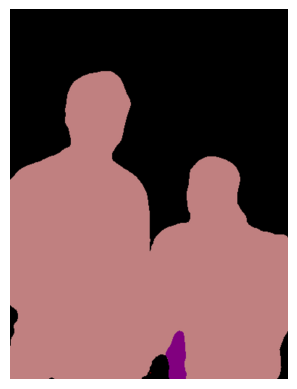

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('image_new.jpg') #Replace "image.jpg" with the path of your image
plt.imshow(img)
plt.axis('off')
plt.show()

In [6]:
segment_image.segmentAsPascalvoc("/content/WhatsApp Image 2023-11-21 at 17.56.17_f6b7fd3c.jpg", output_image_name = "image_new_overlay.jpg", overlay = True);

1/1 [==============================] - 11s 11s/step
Processed Image saved successfully in your current working directory.


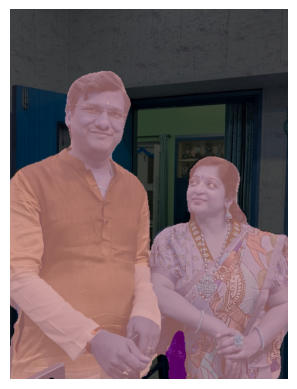

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('image_new_overlay.jpg') #Replace "image.jpg" with the path of your image
plt.imshow(img)
plt.axis('off')
plt.show()

In [22]:
!pip3 install mxnet-mkl==1.6.0 numpy==1.23.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 63.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
chex 0.1.85 requires numpy>=1.24.1, but you have numpy 1.23.1 which is incompatible.
tensorflow 2.15.0 requires numpy<2.0.0,

In [8]:
from pixellib.instance import instance_segmentation

segment_image = instance_segmentation()
segment_image.load_model("/content/drive/MyDrive/mask_rcnn_coco.h5")

Instructions for updating:
Use fn_output_signature instead


In [10]:
segment_image.segmentImage("/content/WhatsApp Image 2023-11-21 at 17.56.17_f6b7fd3c.jpg", output_image_name = "image_inc.jpg");

Processed image saved successfully in your current working directory.


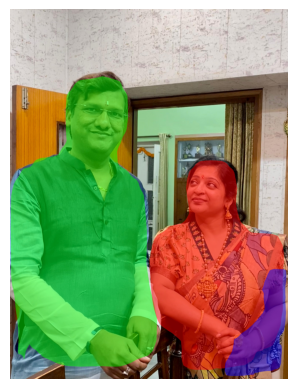

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('image_inc.jpg') #Replace "image.jpg" with the path of your image
plt.imshow(img)
plt.axis('off')
plt.show()

In [12]:
segment_image.segmentImage("/content/WhatsApp Image 2023-11-21 at 17.56.17_f6b7fd3c.jpg", output_image_name = "image_inc_bb.jpg", show_bboxes = True);

Processed image saved successfully in your current working directory.


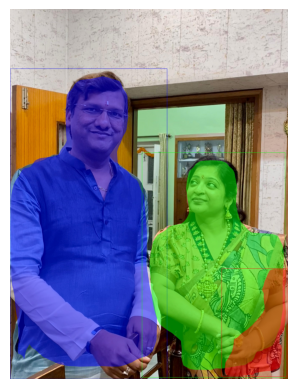

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('image_inc_bb.jpg') #Replace "image.jpg" with the path of your image
plt.imshow(img)
plt.axis('off')
plt.show()